EDA on the results of the Replanning Experiment run on 17/02/21. In this configuration, used $\gamma = [0.00:1.00]$ with $0.50$ increments. For each new $\gamma$ value, a new set of input are generated. The input are held fixed for 10 iterations.

In [63]:
from collections import defaultdict
from collections import Counter
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Single Run per Gamma

In [2]:
root_out_dir = '/Users/daddy30000/14_Mobility_Sim/GoogleDrive/SmartBay/CRS_location_choice/output_v1/replanning_experiment/matsim_out'

In [3]:
# iterate through every directory. Build one big super dataframe
ordir = os.getcwd()
os.chdir(root_out_dir)
folders = [n for n in os.listdir('.') if n[0].isdigit()]

In [4]:
dfs = []
for f in folders:
    temp = pd.read_csv(f + '/ITERS/it.10/ReplanningExperiment.10.Analysis.RatedActivityTravel.txt')
    temp['gamma'] = float(f)
    dfs.append(temp)
df = pd.concat(dfs, ignore_index=True)
# remove all iteration 0 rows
df = df[df.iteration != 0]
print df.shape

(21000, 7)


## Distribution of all visitors over $\gamma$

In [5]:
avg_crowds = df[['gamma', 'facility_id', 'iteration']].groupby(['gamma', 'facility_id']).count().reset_index()
avg_crowds.rename(columns={'iteration': 'visitors'}, inplace=True)

In [6]:
summary = pd.pivot_table(avg_crowds, values='visitors', index=['gamma'], columns=['facility_id'], aggfunc=np.sum, fill_value=0).unstack(fill_value=0).reset_index()
summary.rename(columns={0:'visitors'}, inplace=True)

In [7]:
summary.head()

facility_id  gamma  visitors
0          100   0.00        20
1          100   0.05        21
2          100   0.10        36
3          100   0.15        35
4          100   0.20        29

/Users/daddy30000/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


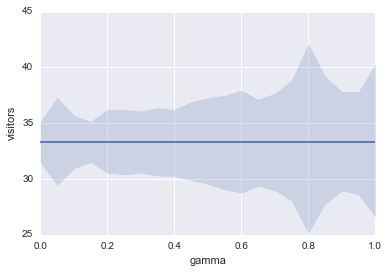

In [8]:
sns.tsplot(time='gamma', value='visitors', unit='facility_id', data=summary)

In [9]:
g = summary[['gamma','visitors']].groupby('gamma')
means = g.mean()
medians = g.median()
tenth = g.quantile(0.1)
twentyfith = g.quantile(0.25)
ninetieth = g.quantile(0.90)
min_visitors = g.min()
max_visitors = g.max()

In [10]:
index = means.index.values

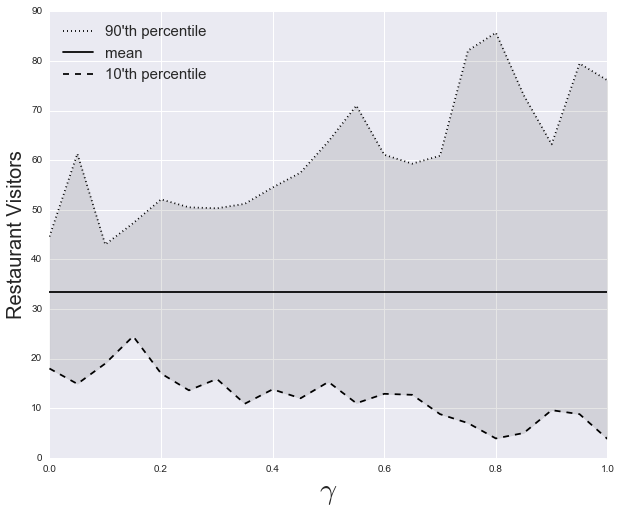

In [11]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, means.values, label='mean', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

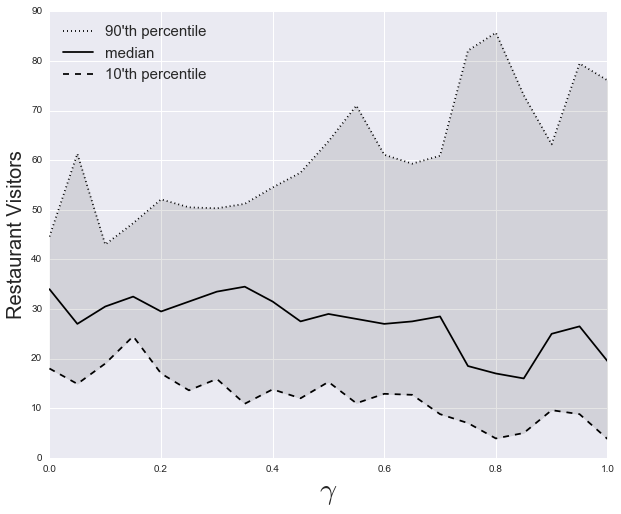

In [12]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

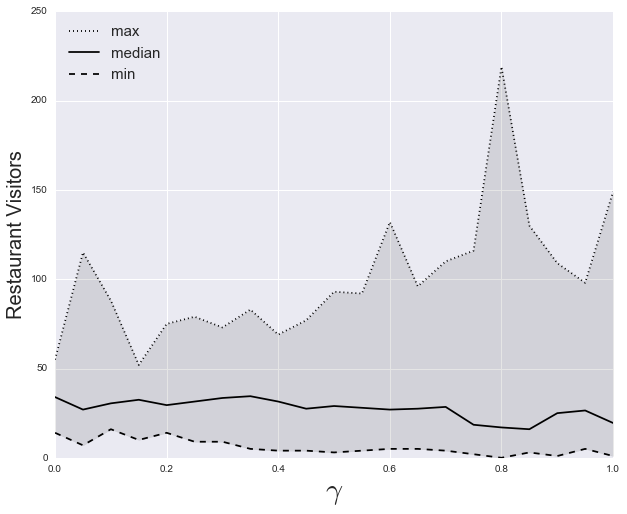

In [13]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, max_visitors.values, ':', label="max", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, min_visitors.values, '--', label="min", color='k')
plt.fill_between(index, min_visitors.values.flatten(), max_visitors.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

## Distribution of most popular restaurants over $\gamma$

In [14]:
#for each gamma
#  for each iteration:
#    get the most popular 

#50 Runs per Gamma

In [15]:
root_out_dir="/Users/daddy30000/14_Mobility_Sim/GoogleDrive/SmartBay/CRS_location_choice/output_bigger"
# iterate through every directory. Build one big super dataframe
ordir = os.getcwd()
os.chdir(root_out_dir)
files = [n for n in os.listdir('.') if n[0].isdigit()]

In [16]:
dfs = []
for f in files:
    temp = pd.read_csv(f)
    g_str = f.split('.')[0]
    g_parts = g_str.split('p')
    temp['gamma'] = float(g_parts[0]) + float(g_parts[1])/100.0
    run = f.split('.')[1]
    temp['run'] = run
    dfs.append(temp)
df = pd.concat(dfs, ignore_index=True)
# remove all iteration 0 rows
df = df[df.iteration != 0]
print df.shape

(525000, 8)


In [27]:
df.head()

iteration  facility_id  person_id  distance  travel_time  act_time  \
100          1          109          0    1400.0        770.0    3539.0   
101          1          112          1    2000.0       1100.0    3537.0   
102          1          110          2    2000.0       1100.0    3545.0   
103          1          115          3    5800.0       3190.0    3517.0   
104          1          105          4    3400.0       1870.0    3529.0   

     gamma run  
100    0.0   1  
101    0.0   1  
102    0.0   1  
103    0.0   1  
104    0.0   1

In [46]:
g = df.groupby(['gamma', 'run', 'iteration'])

In [47]:
len(g.groups)

5250

In [56]:
k=g.groups.keys()[1]
print k

(0.45, '21', 3)


In [60]:
fac_ids = np.arange(100,130)
print max(fac_ids)

129


In [101]:
g = df.groupby(['gamma', 'run', 'iteration'])
counts = []
gammas = []
fac_ids = np.arange(100,130)
for k in g.groups.keys():
    grp = g.get_group(k)
    fids, cnts = np.unique(grp.facility_id, return_counts=True)
    n_missing = fac_ids.shape[0] - cnts.shape[0]
    cnts = cnts.tolist()
    cnts += [0]*n_missing
    counts += cnts
    gammas += [k[0]]*fac_ids.shape[0]
summary = pd.DataFrame({'visitors': counts, 'gamma': gammas})

In [102]:
summary.shape

(157500, 2)

In [95]:
g = summary.groupby('gamma')
means = g.mean()
medians = g.median()
tenth = g.quantile(0.1)
twentyfith = g.quantile(0.25)
ninetieth = g.quantile(0.90)
min_visitors = g.min()
max_visitors = g.max()

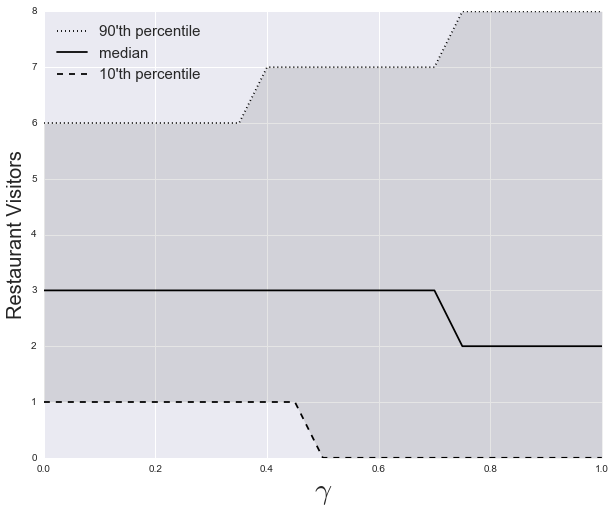

In [96]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

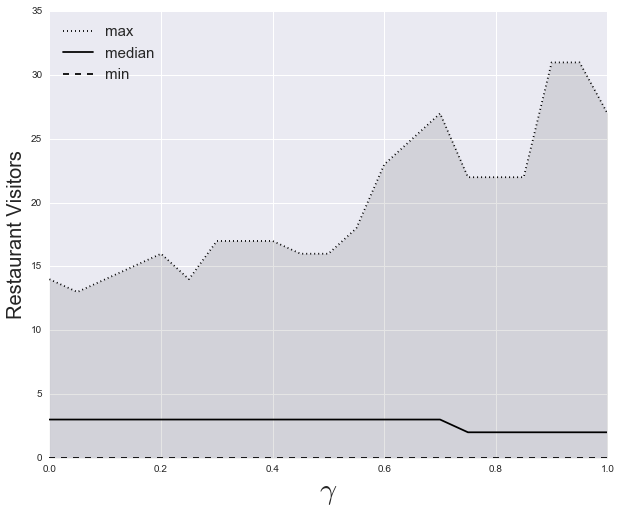

In [97]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, max_visitors.values, ':', label="max", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, min_visitors.values, '--', label="min", color='k')
plt.fill_between(index, min_visitors.values.flatten(), max_visitors.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

## V2 not grouping by iteration

In [171]:
g0 = df.groupby(['gamma', 'run'])
counts = []
gammas = []
# runs = []
# iterations = []
fac_ids = np.arange(100,130)
for k in g0.groups.keys():
    grp = g0.get_group(k)
    fids, cnts = np.unique(grp.facility_id, return_counts=True)
    n_missing = fac_ids.shape[0] - cnts.shape[0]
    cnts = cnts.tolist()
    cnts += [0]*n_missing
    counts += cnts
    gammas += [k[0]]*fac_ids.shape[0]
#     runs += [g0.get_group(k).run.iloc[0]]*fac_ids.shape[0]
#     iterations += [g0.get_group(k).iteration]*fac_ids.shape[0]
summary = pd.DataFrame({'visitors': counts, 'gamma': gammas, 'run': runs, 'iteration': iterations})

In [172]:
g0.get_group(k).iteration.shape

(1000,)

In [173]:
summary.shape

(15750, 4)

In [174]:
g0 = df.groupby(['gamma', 'run'])
g0.get_group(g0.groups.keys()[0]).head()

iteration  facility_id  person_id  distance  travel_time  act_time  \
104600          1          101          0    4200.0       2310.0    3525.0   
104601          1          108          1    1200.0        660.0    3541.0   
104602          1          102          2   11200.0       6160.0    3492.0   
104603          1          102          3    5600.0       3080.0    3519.0   
104604          1          112          4    5600.0       3080.0    3520.0   

        gamma run  
104600   0.15   5  
104601   0.15   5  
104602   0.15   5  
104603   0.15   5  
104604   0.15   5

In [104]:
summary.shape

(15750, 2)

In [105]:
g = summary.groupby('gamma')
means = g.mean()
medians = g.median()
tenth = g.quantile(0.1)
twentyfith = g.quantile(0.25)
ninetieth = g.quantile(0.90)
min_visitors = g.min()
max_visitors = g.max()

In [111]:
g1 = g.get_group(g.groups.keys()[0])
print g1.shape
print g1.head()

(750, 1)
     visitors
330        35
331        14
332        75
333        17
334        33


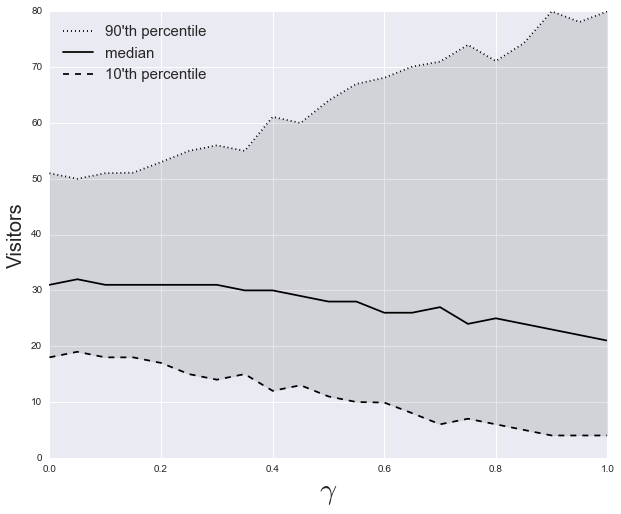

In [156]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

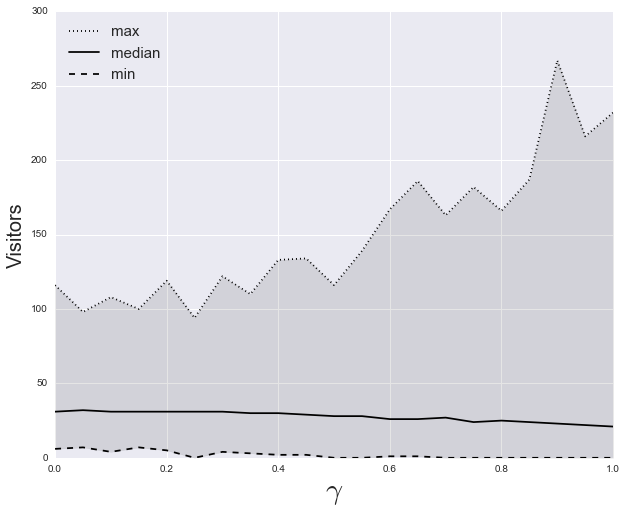

In [157]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, max_visitors.values, ':', label="max", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, min_visitors.values, '--', label="min", color='k')
plt.fill_between(index, min_visitors.values.flatten(), max_visitors.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

## Crowd bar charts

In [135]:
keys = g.groups.keys()
keys.sort()
g1 = g.get_group(keys[0]).sort_values(by='visitors', axis=0)
g2 = g.get_group(keys[4]).sort_values(by='visitors', axis=0)
g3 = g.get_group(keys[8]).sort_values(by='visitors', axis=0)
g4 = g.get_group(keys[12]).sort_values(by='visitors', axis=0)
g5 = g.get_group(keys[16]).sort_values(by='visitors', axis=0)
g6 = g.get_group(keys[20]).sort_values(by='visitors', axis=0)

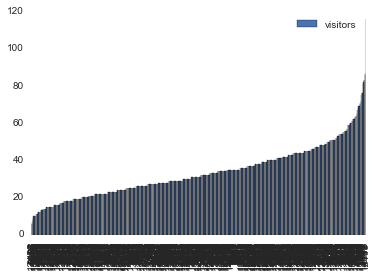

In [137]:
g1.plot.bar()

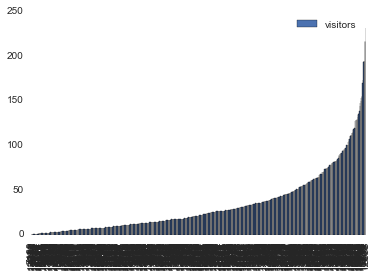

In [138]:
g6.plot.bar()

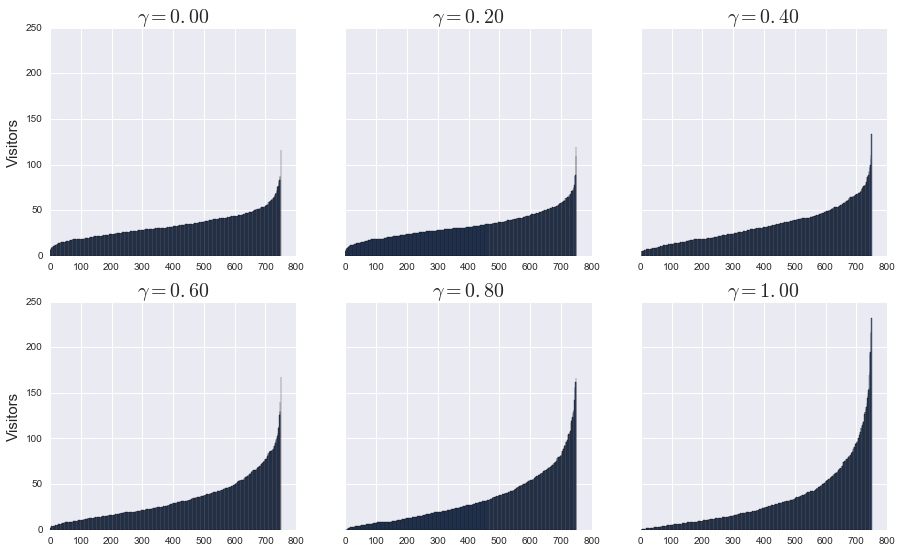

In [154]:
f, axr = plt.subplots(2,3, figsize=(15,9), sharey=True)
axr[0,0].bar(np.arange(g1.shape[0]), g1.visitors)
axr[0,0].set_title('$\gamma = 0.00$', fontsize=20)
axr[0,0].set_ylabel('Visitors', fontsize=15)
axr[0,1].bar(np.arange(g2.shape[0]), g2.visitors)
axr[0,1].set_title('$\gamma = 0.20$', fontsize=20)
axr[0,2].bar(np.arange(g3.shape[0]), g3.visitors)
axr[0,2].set_title('$\gamma = 0.40$', fontsize=20)
axr[1,0].bar(np.arange(g4.shape[0]), g4.visitors)
axr[1,0].set_title('$\gamma = 0.60$', fontsize=20)
axr[1,0].set_ylabel('Visitors', fontsize=15)
axr[1,1].bar(np.arange(g5.shape[0]), g5.visitors)
axr[1,1].set_title('$\gamma = 0.80$', fontsize=20)
axr[1,2].bar(np.arange(g6.shape[0]), g6.visitors)
axr[1,2].set_title('$\gamma = 1.00$', fontsize=20)

## Plot Herfindahl Index

In [199]:
# Calculates the Herfindahl index for a dataframe that has been grouped by gamma and run
def herf_index(dft):
    temp = dft.groupby('facility_id').count()
    total = temp['person_id'].sum()
    market_shares = temp['person_id'] / total
    return market_shares.pow(2).sum()

In [242]:
g2 = df.groupby(['gamma', 'run'])
gammas = []
hf_indices = []
runs = []
for k in g2.groups.keys():
    dft = g2.get_group(k)
    hi = herf_index(dft)
    gammas.append(k[0])
    hf_indices.append(hi)
    runs.append(k[1])
hidf = pd.DataFrame({'gamma': gammas, 'herf_idx': hf_indices, 'runs': runs})

In [210]:
g7 = hidf.groupby('gamma')
means = g7.mean()
medians = g7.median()
tenth = g7.quantile(0.1)
twentyfith = g7.quantile(0.25)
ninetieth = g7.quantile(0.90)
min_visitors = g7.min()
max_visitors = g7.max()

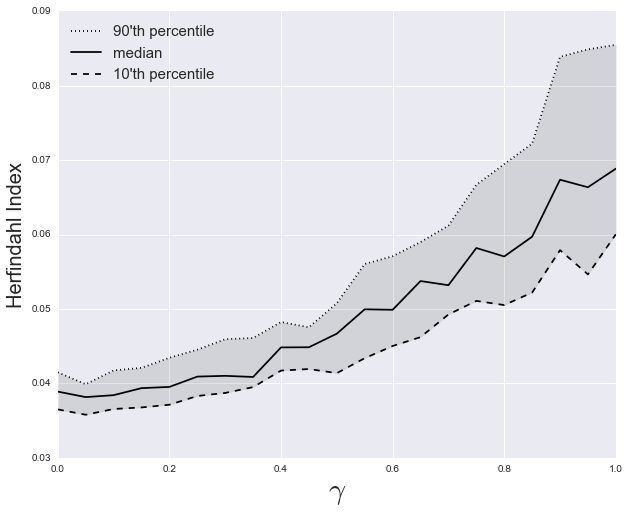

In [214]:
index = means.index.values
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Herfindahl Index', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

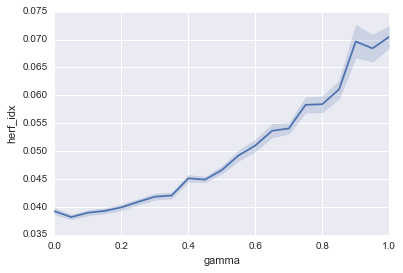

In [243]:
sns.tsplot(time='gamma', value='herf_idx', unit='runs', data=hidf)

# Distance distributions

In [219]:
df.head()

iteration  facility_id  person_id  distance  travel_time  act_time  \
100          1          109          0    1400.0        770.0    3539.0   
101          1          112          1    2000.0       1100.0    3537.0   
102          1          110          2    2000.0       1100.0    3545.0   
103          1          115          3    5800.0       3190.0    3517.0   
104          1          105          4    3400.0       1870.0    3529.0   

     gamma run  
100    0.0   1  
101    0.0   1  
102    0.0   1  
103    0.0   1  
104    0.0   1

In [247]:
g8 = df[['gamma', 'distance']].groupby('gamma')
means = g8.mean()
medians = g8.median()
tenth = g8.quantile(0.1)
twentyfith = g8.quantile(0.25)
ninetieth = g8.quantile(0.90)
min_visitors = g8.min()
max_visitors = g8.max()

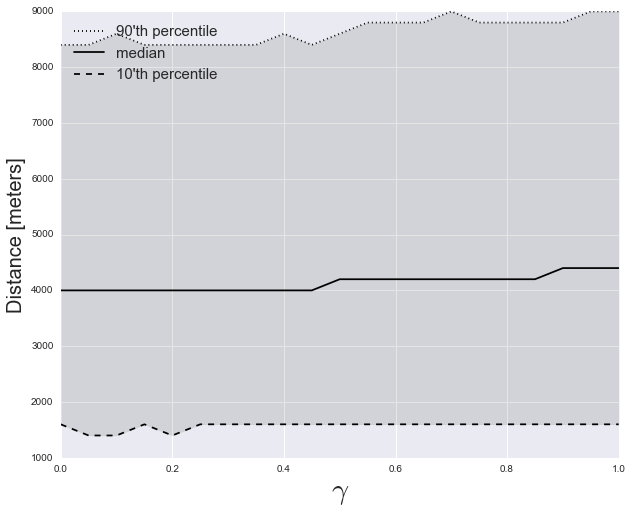

In [227]:
index = means.index.values
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Distance [meters]', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

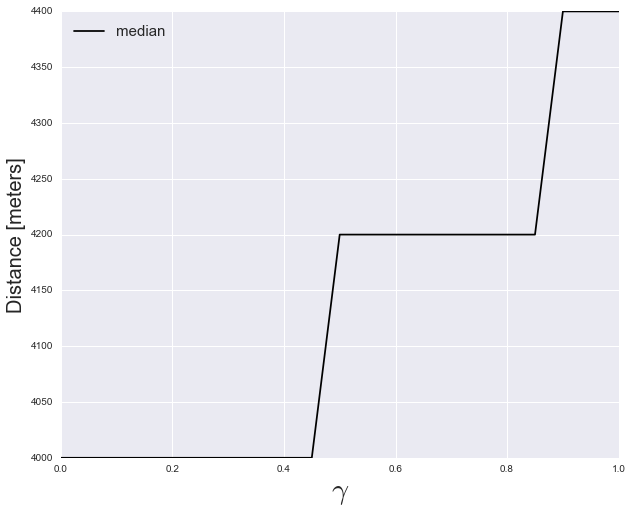

In [238]:
index = means.index.values
fig = plt.figure(figsize=(10,8))

# plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
# plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
# plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Distance [meters]', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

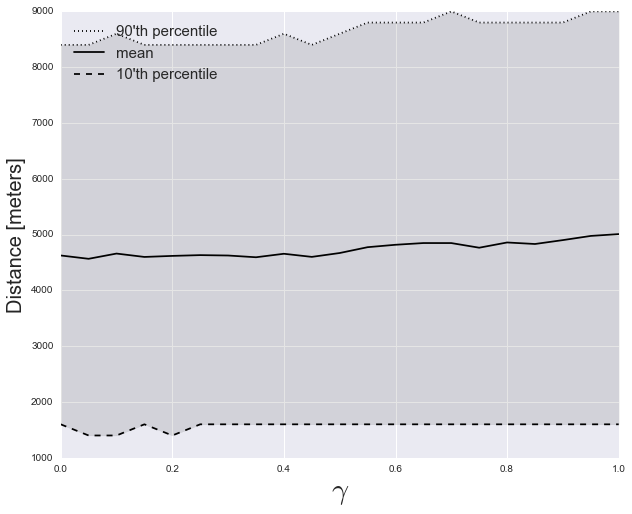

In [237]:
index = means.index.values
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, means.values, label='mean', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Distance [meters]', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

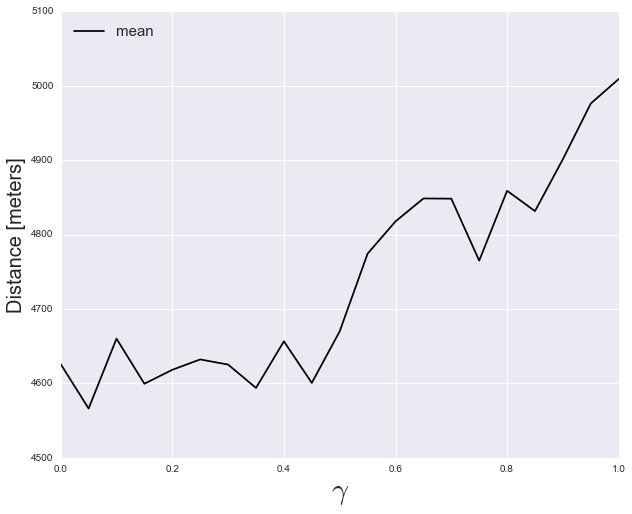

In [236]:
index = means.index.values
fig = plt.figure(figsize=(10,8))

# plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, means.values, label='mean', color='k')
# plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
# plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Distance [meters]', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

In [229]:
keys = g8.groups.keys()
keys.sort()
g11 = g8.get_group(keys[0]).sort_values(by='distance', axis=0)
g12 = g8.get_group(keys[4]).sort_values(by='distance', axis=0)
g13 = g8.get_group(keys[8]).sort_values(by='distance', axis=0)
g14 = g8.get_group(keys[12]).sort_values(by='distance', axis=0)
g15 = g8.get_group(keys[16]).sort_values(by='distance', axis=0)
g16 = g8.get_group(keys[20]).sort_values(by='distance', axis=0)

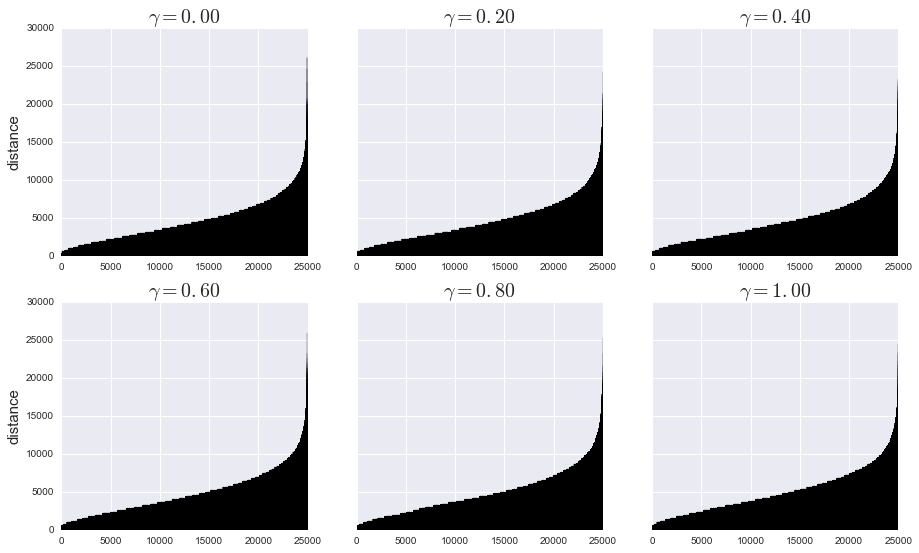

In [233]:
f, axr = plt.subplots(2,3, figsize=(15,9), sharey=True)
axr[0,0].bar(np.arange(g11.shape[0]), g11.distance)
axr[0,0].set_title('$\gamma = 0.00$', fontsize=20)
axr[0,0].set_ylabel('distance', fontsize=15)
axr[0,1].bar(np.arange(g12.shape[0]), g12.distance)
axr[0,1].set_title('$\gamma = 0.20$', fontsize=20)
axr[0,2].bar(np.arange(g13.shape[0]), g13.distance)
axr[0,2].set_title('$\gamma = 0.40$', fontsize=20)
axr[1,0].bar(np.arange(g14.shape[0]), g14.distance)
axr[1,0].set_title('$\gamma = 0.60$', fontsize=20)
axr[1,0].set_ylabel('distance', fontsize=15)
axr[1,1].bar(np.arange(g15.shape[0]), g15.distance)
axr[1,1].set_title('$\gamma = 0.80$', fontsize=20)
axr[1,2].bar(np.arange(g16.shape[0]), g16.distance)
axr[1,2].set_title('$\gamma = 1.00$', fontsize=20)

# Travel time distributions 

# Old stuffs

In [20]:
avg_crowds.shape

(630, 3)

In [21]:
30*10*25

7500

In [22]:
g = summary[['gamma','visitors']].groupby('gamma')
means = g.mean()
medians = g.median()
tenth = g.quantile(0.1)
twentyfith = g.quantile(0.25)
ninetieth = g.quantile(0.90)
min_visitors = g.min()
max_visitors = g.max()

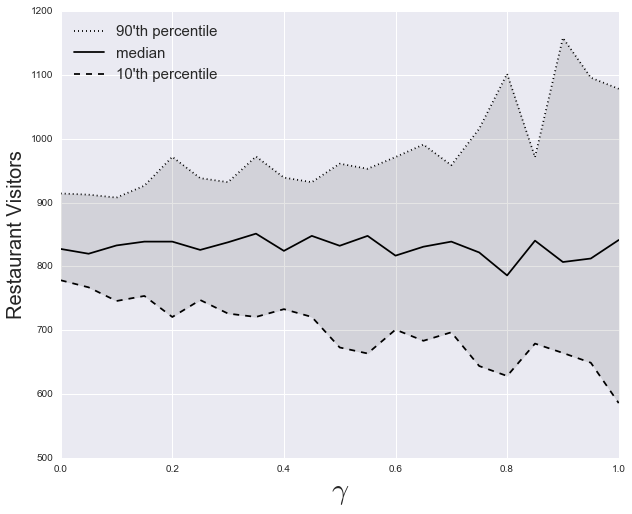

In [23]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, ninetieth, ':', label="90'th percentile", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, tenth.values, '--', label="10'th percentile", color='k')
plt.fill_between(index, tenth.values.flatten(), ninetieth.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

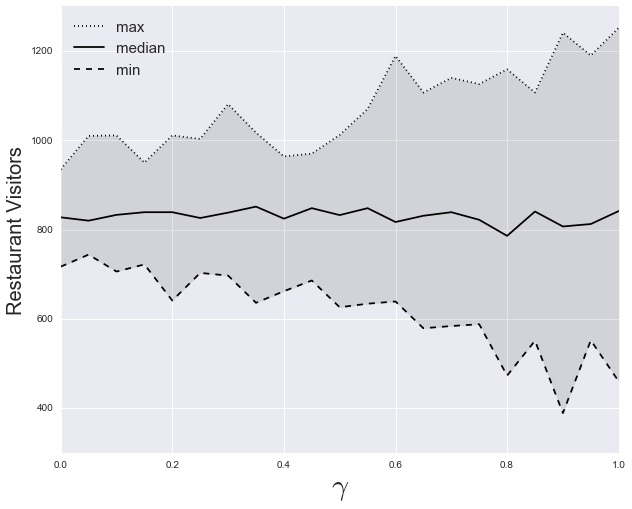

In [24]:
fig = plt.figure(figsize=(10,8))

plt.plot(index, max_visitors.values, ':', label="max", color='k')
plt.plot(index, medians.values, label='median', color='k')
plt.plot(index, min_visitors.values, '--', label="min", color='k')
plt.fill_between(index, min_visitors.values.flatten(), max_visitors.values.flatten(), color='k', alpha=0.1)
plt.xlabel('$\gamma$', fontsize=30)
plt.ylabel('Restaurant Visitors', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

## Herfindahl Index

In [64]:
np.unique([1,1,1,2,2,3], return_counts=True)

(array([1, 2, 3]), array([3, 2, 1]))